# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data

In [88]:
import pandas as pd
customers = pd.read_csv("https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/mallcustomers.csv")
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
customers.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

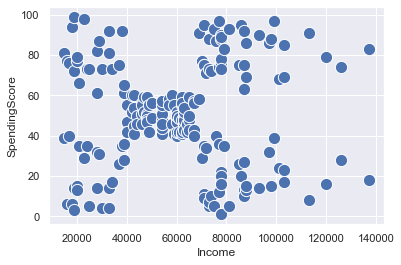

In [5]:
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

## 3. Prepare the Data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [8]:
customers_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [10]:
customers['Income'].mean()

60560.0

In [11]:
customers['Income'].std()

26264.721165271243

In [ ]:
#StandardScaler

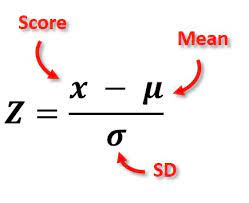

In [13]:
(customers['Income']-customers['Income'].mean())/customers['Income'].std()

0     -1.734646
1     -1.734646
2     -1.696572
3     -1.696572
4     -1.658498
         ...   
195    2.263112
196    2.491555
197    2.491555
198    2.910368
199    2.910368
Name: Income, Length: 200, dtype: float64

In [14]:
customers_scaled = pd.DataFrame(customers_scaled, 
                                columns = ['Income', 'SpendingScore'])

In [15]:
customers_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## 3. Create the Clusters

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_init=25,random_state=1234)
km.fit(customers_scaled) #traning
km

KMeans(n_clusters=3, n_init=25, random_state=1234)

# Attributes of KMeans Model

In [21]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [22]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [24]:
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
km.inertia_


157.70400815035947

In [25]:
km.n_iter_

2

In [27]:
km.n_features_in_

2

In [28]:
km.feature_names_in_

array(['Income', 'SpendingScore'], dtype=object)

# visualization

In [30]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


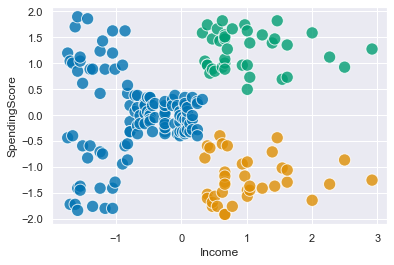

In [34]:
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

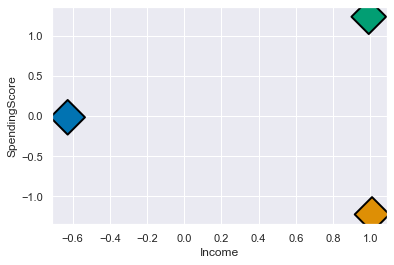

In [35]:
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

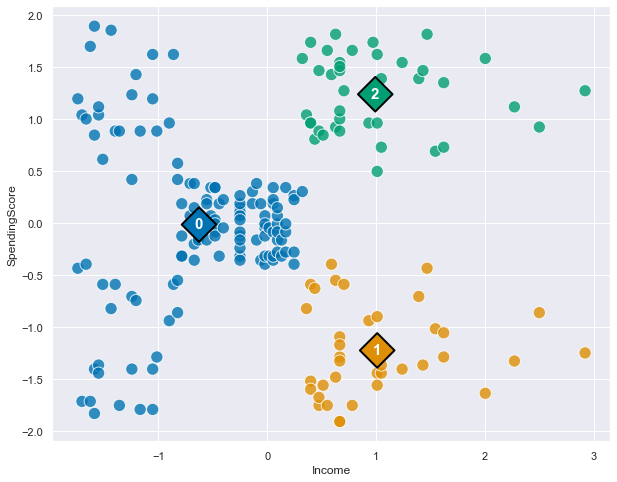

In [41]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

## 5. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

In [42]:
km.inertia_ # k=3  wcss

157.70400815035947

In [44]:
wcss=[]
for k in range(1,12):
    km=KMeans(n_clusters=k,n_init=25,random_state=123)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

In [45]:
wcss

[399.9999999999999,
 269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.86628627232253,
 37.22818767758588,
 32.33081392367576,
 29.090568897369714,
 26.462691239784462]

In [47]:
wcss_series = pd.Series(wcss, index = range(1, 12))
wcss_series

1     400.000000
2     269.299343
3     157.704008
4     108.921317
5      65.568408
6      55.057348
7      44.866286
8      37.228188
9      32.330814
10     29.090569
11     26.462691
dtype: float64

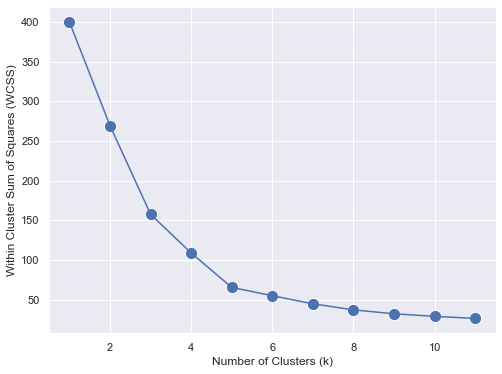

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

In [54]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

In [55]:
silhouette

[0.2895327013768624,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.526345449071225,
 0.45644093438859246,
 0.45941332778471505,
 0.4476280825932578]

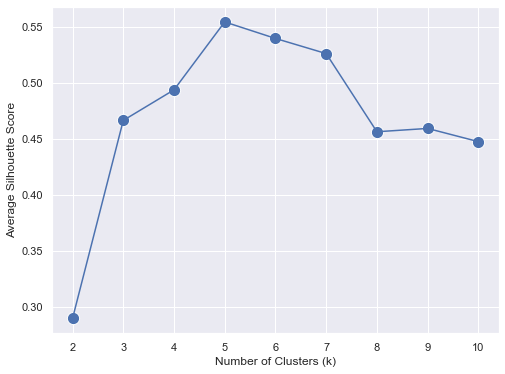

In [56]:
silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

In [58]:
from sklearn.metrics import calinski_harabasz_score  
calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))


In [59]:
calinski

[96.3305882355264,
 151.33512126359483,
 174.5952145929763,
 248.64932001536363,
 243.08789485068303,
 254.32469420700534,
 267.8884623844161,
 271.5088410175798,
 269.170061259085]

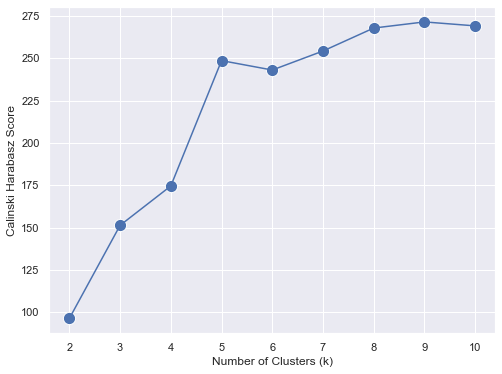

In [60]:
calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

## 6. Analyze and Interpret the Clusters

In [61]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)
km

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [63]:
km.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [68]:
pd.Series(km.labels_).value_counts().sort_index()

0    23
1    35
2    39
3    22
4    81
dtype: int64

In [69]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

In [70]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


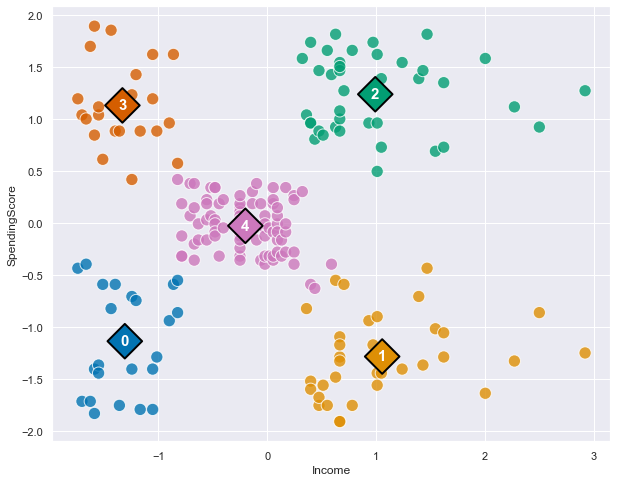

In [71]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [ ]:
LL,HL,HH,LH,MM

In [74]:
km.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [91]:
customers['Clusters']=km.labels_

In [92]:
customers  # target labelis added as Cluster 

,CustomerID,Gender,Age,Income,SpendingScore,Clusters
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
...,...,...,...,...,...,...
195,196,Female,35,120000,79,2
196,197,Female,45,126000,28,1
197,198,Male,32,126000,74,2
198,199,Male,32,137000,18,1


In [ ]:
'LL','HL','HH','LH','MM'

In [93]:
customers['Clusters']=customers['Clusters'].map({0:'Low_incomLow_spend',1:'High_incomeLow_spend',2:'High_incomeH_spend',3:'Low_incomeHigh_spend',4:'Middle_incomeMiddle_spend'})

In [94]:
customers

,CustomerID,Gender,Age,Income,SpendingScore,Clusters
0,1,Male,19,15000,39,Low_incomLow_spend
1,2,Male,21,15000,81,Low_incomeHigh_spend
2,3,Female,20,16000,6,Low_incomLow_spend
3,4,Female,23,16000,77,Low_incomeHigh_spend
4,5,Female,31,17000,40,Low_incomLow_spend
...,...,...,...,...,...,...
195,196,Female,35,120000,79,High_incomeH_spend
196,197,Female,45,126000,28,High_incomeLow_spend
197,198,Male,32,126000,74,High_incomeH_spend
198,199,Male,32,137000,18,High_incomeLow_spend


In [95]:
customers[customers['Clusters']=='High_incomeH_spend']

,CustomerID,Gender,Age,Income,SpendingScore,Clusters
123,124,Male,39,69000,91,High_incomeH_spend
125,126,Female,31,70000,77,High_incomeH_spend
127,128,Male,40,71000,95,High_incomeH_spend
129,130,Male,38,71000,75,High_incomeH_spend
131,132,Male,39,71000,75,High_incomeH_spend
133,134,Female,31,72000,71,High_incomeH_spend
135,136,Female,29,73000,88,High_incomeH_spend
137,138,Male,32,73000,73,High_incomeH_spend
139,140,Female,35,74000,72,High_incomeH_spend
141,142,Male,32,75000,93,High_incomeH_spend


In [97]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Clusters,Gender_Female,Gender_Male
0,1,19,15000,39,Low_incomLow_spend,0,1
1,2,21,15000,81,Low_incomeHigh_spend,0,1
2,3,20,16000,6,Low_incomLow_spend,1,0
3,4,23,16000,77,Low_incomeHigh_spend,1,0
4,5,31,17000,40,Low_incomLow_spend,1,0
5,6,22,17000,76,Low_incomeHigh_spend,1,0
6,7,35,18000,6,Low_incomLow_spend,1,0
7,8,23,18000,94,Low_incomeHigh_spend,1,0
8,9,64,19000,3,Low_incomLow_spend,0,1
9,10,30,19000,72,Low_incomeHigh_spend,1,0


In [98]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [100]:
customers.groupby('Clusters').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Clusters,,,,,
High_incomeH_spend,0.54,0.46,32.0,79000.0,83.0
High_incomeLow_spend,0.46,0.54,42.0,85000.0,16.0
Low_incomLow_spend,0.61,0.39,46.0,25000.0,17.0
Low_incomeHigh_spend,0.59,0.41,23.5,24500.0,77.0
Middle_incomeMiddle_spend,0.59,0.41,46.0,54000.0,50.0


#### What actionable insights can you come up with based on the clustering results?

In terms of a customer relations strategy, it would make sense to:
1. Invest in increasing the spending of the high earning low spending customers in cluster 1.
2. Keep the high earning, high spending customers in cluster 2 happy.
3. Keep a watchful eye on the low earning, high spending customers in cluster 3.


# LAB EXERCISE 

### K-Mean clustering for Wine Quality Data